In [1]:
#load libraries
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import keras
import sklearn.feature_selection as skfs

C:\Users\Madhushi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#To normalize data
from sklearn.preprocessing import MinMaxScaler
#To encode
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
# Feature Importance
from sklearn import datasets
from sklearn import metrics
#Split data set
from sklearn.model_selection import train_test_split
#For KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
#Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping

In [3]:
# define column names
names = ['age', 'workclass', 'education', 'education-num', 'marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

# loading training data (df = data frame)
df = pd.read_csv(r"C:\Users\Madhushi\Desktop\ML1_Assignment\Adult_Census_Income_Binary_Classification_dataset.csv", header=0, names=names, sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)

#display first 3 rows of the data frame
df.head(3)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [4]:
#Pre processing 1 - Removing missing values start

#number of missing values in each column
(df[['age', 'workclass', 'education', 'education-num', 'marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']] == "?").sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [5]:
# mark ? values as missing or NaN
df[['workclass', 'occupation','native-country']] = df[['workclass', 'occupation','native-country']].replace('?', np.NaN)

# count the number of NaN values in each column
df.isnull().sum()

# drop rows with missing values
df.dropna(inplace=True)

#removing missing values end

In [6]:
#Pre processing 2 - Binning Start(Continuous variables)

#Bin Age
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = [0,1,2,3,4,5,6,7,8,9]
df['age_binned'] = pd.cut(df['age'], bins=bins, labels=labels)
#df.assign(age_binned=df.groupby(pd.cut(df['age'], bins=bins, labels=labels))['age'].transform('age_binned'))

#Bin education number
bins = [0,5,10,15,20]
labels = [0,1,2,3]
df['education-num_binned'] = pd.cut(df['education-num'], bins=bins, labels=labels)

#Bin capital gain
#Those who have a capital gain will be marked as 1
bins = [-1,1,1000000]
labels = [0,1]
df['capital-gain_binned'] = pd.cut(df['capital-gain'], bins=bins, labels=labels)

#Bin capital loss
#Those who have a capital loss will be marked as 1
bins = [-1,1,1000000]
labels = [0,1]
df['capital-loss_binned'] = pd.cut(df['capital-loss'], bins=bins, labels=labels)

#Bin hours per week
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = [0,1,2,3,4,5,6,7,8,9]
df['hours-per-week_binned'] = pd.cut(df['hours-per-week'], bins=bins, labels=labels)

#Binning end
df.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_binned,education-num_binned,capital-gain_binned,capital-loss_binned,hours-per-week_binned
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,3,2,1,0,3
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,4,2,0,0,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,3,1,0,0,3
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,5,1,0,0,3
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,2,2,0,0,3


In [7]:
#Pre processinng 3 - Encoding Categorical Data

le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in names:
       #Encoding only categorical variables
       if df[col].dtypes == 'object':
        #Using whole data to form an exhaustive list of levels
           le.fit(df[col].values)
           df[col]=le.transform(df[col])
            
df.head(3)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_binned,education-num_binned,capital-gain_binned,capital-loss_binned,hours-per-week_binned
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,0,3,2,1,0,3
1,50,4,9,13,2,3,0,4,1,0,0,13,38,0,4,2,0,0,1
2,38,2,11,9,0,5,1,4,1,0,0,40,38,0,3,1,0,0,3


In [8]:
#Dividing into training and testing datasets start

# create design matrix X and target vector y
#X = np.array(df.loc['workclass', 'education', 'marital-status','occupation','relationship','race','sex','capital-gain','capital-loss', 'native-country', 'education-num_binned', 'age_binned', 'hours-per-week_binned'])
#y = np.array(df['income'])

y = df.income
X = df.drop(['income', 'age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'], axis=1)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #, random_state=42

#Dividing into training and testing datasets end

In [9]:
#Preprocessing 4 - Feature Extraction


In [10]:
#Order of importance
#occupation, relationship, age_binned, marital-status, hours-per-week_binned, education-num_binned, education, capital-gain_binned, workclass, sex, native-country, capital-loss_binned, race

In [11]:
X.head(1)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age_binned,education-num_binned,capital-gain_binned,capital-loss_binned,hours-per-week_binned
0,5,9,4,0,1,4,1,38,3,2,1,0,3


In [12]:
################################################################################################
#KNN algorithm Using Python `sklearn' package start

#Instatiating Training and evaluating the model start

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred))

0.8190960327107968


In [13]:
#Finding the optimal k start

# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 13


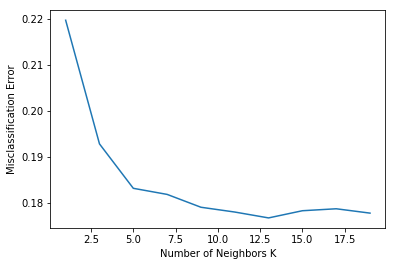

In [14]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#Finding the optimal k end

In [15]:
#Re-evaluating with the optimal k start

# instantiate learning model (k = 15)
knn = KNeighborsClassifier(n_neighbors=15)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred))

#Re-evaluating with the optimal k end

#KNN algorithm Using Python `sklearn' package end
################################################################################################

0.8265001657641728


In [16]:
################################################################################################
#Logistic regression algorithm Using Keras start

#Instatiating Training and evaluating the model start

# instantiate learning model
rgmodel = Sequential()
rgmodel.add(Dense(1, activation='sigmoid', input_dim=13))
rgmodel.compile(optimizer='rmsprop', loss='binary_crossentropy')

# fitting the model
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
rgmodel.fit(X_train, y_train, epochs=1000, validation_split=0.1, callbacks=[early_stopping])

# predict the response
lr_pred = rgmodel.predict(X_test)
lr_pred = (lr_pred > 0.5)

# evaluate accuracy with confusionmatrix
cm = confusion_matrix(y_test, lr_pred)
print(cm)
print(accuracy_score(y_test, lr_pred))

#Logistic regression algorithm Using Keras end
################################################################################################

Train on 19001 samples, validate on 2112 samples
Epoch 1/1000
19001/19001 [==============================] - 6s 317us/step - loss: 0.9876 - val_loss: 0.6208
Epoch 2/1000
19001/19001 [==============================] - 1s 33us/step - loss: 0.5671 - val_loss: 0.5057
Epoch 3/1000
19001/19001 [==============================] - 1s 40us/step - loss: 0.4977 - val_loss: 0.4693
Epoch 4/1000
19001/19001 [==============================] - 1s 27us/step - loss: 0.4688 - val_loss: 0.4520
Epoch 5/1000
19001/19001 [==============================] - 1s 30us/step - loss: 0.4553 - val_loss: 0.4435
Epoch 6/1000
19001/19001 [==============================] - 1s 41us/step - loss: 0.4480 - val_loss: 0.4400
Epoch 7/1000
19001/19001 [==============================] - 1s 37us/step - loss: 0.4436 - val_loss: 0.4604
Epoch 8/1000
19001/19001 [==============================] - 1s 47us/step - loss: 0.4413 - val_loss: 0.4355
Epoch 9/1000
19001/19001 [==============================] - 1s 30us/step - loss: 0.4395 - val_

In [17]:
################################################################################################
#Neural Network algorithm Using Keras start

# instantiate learning model
classifier = Sequential()

# Adding the input layer aand the first hidden layer
classifier.add(Dense(activation = "relu", input_dim = 13, units = 20, kernel_initializer="uniform"))
# Adding the second hidden layer
classifier.add(Dense(activation = "relu",units = 20, kernel_initializer="uniform"))
# Adding the third hidden layer
classifier.add(Dense(activation = "relu",units = 20, kernel_initializer="uniform"))
# Adding the fourth hidden layer
classifier.add(Dense(activation = "relu",units = 20, kernel_initializer="uniform"))
# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
classifier.fit(X_train, y_train, batch_size = 100, epochs = 1000, callbacks=[early_stopping])

# predict the response
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# evaluate accuracy with confusionmatrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

#Nural Network algorithm Using keras end
################################################################################################

Epoch 1/1000
21113/21113 [==============================] - 1s 33us/step - loss: 0.5838 - acc: 0.7483
Epoch 2/1000
 9700/21113 [============>.................] - ETA: 0s - loss: 0.4977 - acc: 0.7502

C:\Users\Madhushi\Anaconda3\lib\site-packages\keras\callbacks.py:535: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


21113/21113 [==============================] - 0s 15us/step - loss: 0.4802 - acc: 0.7565
Epoch 3/1000
21113/21113 [==============================] - 0s 21us/step - loss: 0.4352 - acc: 0.8024
Epoch 4/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.4107 - acc: 0.8103
Epoch 5/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3972 - acc: 0.8146
Epoch 6/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3913 - acc: 0.8165
Epoch 7/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3867 - acc: 0.8148
Epoch 8/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3809 - acc: 0.8173
Epoch 9/1000
21113/21113 [==============================] - 0s 12us/step - loss: 0.3775 - acc: 0.8177
Epoch 10/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3744 - acc: 0.8182
Epoch 11/1000
21113/21113 [==============================] - 0s 18us/step - loss: 0.3727 - acc

21113/21113 [==============================] - 1s 25us/step - loss: 0.3495 - acc: 0.8337
Epoch 82/1000
21113/21113 [==============================] - 0s 17us/step - loss: 0.3501 - acc: 0.8334
Epoch 83/1000
21113/21113 [==============================] - 0s 16us/step - loss: 0.3495 - acc: 0.8317
Epoch 84/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3492 - acc: 0.8345
Epoch 85/1000
21113/21113 [==============================] - 0s 22us/step - loss: 0.3486 - acc: 0.8341
Epoch 86/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3482 - acc: 0.8340
Epoch 87/1000
21113/21113 [==============================] - 0s 15us/step - loss: 0.3490 - acc: 0.8335
Epoch 88/1000
21113/21113 [==============================] - 0s 16us/step - loss: 0.3481 - acc: 0.8342
Epoch 89/1000
21113/21113 [==============================] - 0s 16us/step - loss: 0.3475 - acc: 0.8354
Epoch 90/1000
21113/21113 [==============================] - 0s 19us/step - loss: 0.348

21113/21113 [==============================] - 0s 21us/step - loss: 0.3456 - acc: 0.8365
Epoch 161/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3448 - acc: 0.8351
Epoch 162/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3444 - acc: 0.8380
Epoch 163/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3435 - acc: 0.8365
Epoch 164/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3438 - acc: 0.8362
Epoch 165/1000
21113/21113 [==============================] - 0s 16us/step - loss: 0.3453 - acc: 0.8359
Epoch 166/1000
21113/21113 [==============================] - 0s 17us/step - loss: 0.3434 - acc: 0.8356
Epoch 167/1000
21113/21113 [==============================] - 0s 17us/step - loss: 0.3439 - acc: 0.8360
Epoch 168/1000
21113/21113 [==============================] - 0s 18us/step - loss: 0.3431 - acc: 0.8385
Epoch 169/1000
21113/21113 [==============================] - 0s 18us/step - lo

21113/21113 [==============================] - 0s 14us/step - loss: 0.3400 - acc: 0.8396
Epoch 239/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3411 - acc: 0.8384
Epoch 240/1000
21113/21113 [==============================] - 0s 17us/step - loss: 0.3414 - acc: 0.8392
Epoch 241/1000
21113/21113 [==============================] - 1s 24us/step - loss: 0.3394 - acc: 0.8392
Epoch 242/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3394 - acc: 0.8386
Epoch 243/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3395 - acc: 0.8389
Epoch 244/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3408 - acc: 0.8405
Epoch 245/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3380 - acc: 0.8400
Epoch 246/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3394 - acc: 0.8393
Epoch 247/1000
21113/21113 [==============================] - 0s 13us/step - lo

21113/21113 [==============================] - 0s 22us/step - loss: 0.3375 - acc: 0.8385
Epoch 317/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3397 - acc: 0.8381
Epoch 318/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3386 - acc: 0.8391
Epoch 319/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3387 - acc: 0.8384
Epoch 320/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3375 - acc: 0.8413
Epoch 321/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3383 - acc: 0.8399
Epoch 322/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3374 - acc: 0.8395
Epoch 323/1000
21113/21113 [==============================] - 0s 12us/step - loss: 0.3391 - acc: 0.8377
Epoch 324/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3375 - acc: 0.8396
Epoch 325/1000
21113/21113 [==============================] - 0s 13us/step - lo

21113/21113 [==============================] - 0s 18us/step - loss: 0.3357 - acc: 0.8390
Epoch 395/1000
21113/21113 [==============================] - 1s 34us/step - loss: 0.3359 - acc: 0.8403
Epoch 396/1000
21113/21113 [==============================] - 1s 25us/step - loss: 0.3359 - acc: 0.8402
Epoch 397/1000
21113/21113 [==============================] - 1s 24us/step - loss: 0.3369 - acc: 0.8391
Epoch 398/1000
21113/21113 [==============================] - 1s 24us/step - loss: 0.3354 - acc: 0.8410
Epoch 399/1000
21113/21113 [==============================] - 0s 18us/step - loss: 0.3364 - acc: 0.8395
Epoch 400/1000
21113/21113 [==============================] - 0s 17us/step - loss: 0.3368 - acc: 0.8412
Epoch 401/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3359 - acc: 0.8406
Epoch 402/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3354 - acc: 0.8426
Epoch 403/1000
21113/21113 [==============================] - 0s 12us/step - lo

21113/21113 [==============================] - 0s 14us/step - loss: 0.3354 - acc: 0.8405
Epoch 473/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3358 - acc: 0.8384
Epoch 474/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3336 - acc: 0.8411
Epoch 475/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3331 - acc: 0.8419
Epoch 476/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3344 - acc: 0.8408
Epoch 477/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3331 - acc: 0.8412
Epoch 478/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3337 - acc: 0.8419
Epoch 479/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3342 - acc: 0.8417
Epoch 480/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3330 - acc: 0.8411
Epoch 481/1000
21113/21113 [==============================] - 0s 13us/step - lo

21113/21113 [==============================] - 0s 13us/step - loss: 0.3314 - acc: 0.8428
Epoch 551/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3303 - acc: 0.8422
Epoch 552/1000
21113/21113 [==============================] - 0s 16us/step - loss: 0.3314 - acc: 0.8424
Epoch 553/1000
21113/21113 [==============================] - 1s 24us/step - loss: 0.3316 - acc: 0.8432
Epoch 554/1000
21113/21113 [==============================] - 0s 23us/step - loss: 0.3312 - acc: 0.8439
Epoch 555/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3318 - acc: 0.8419
Epoch 556/1000
21113/21113 [==============================] - 0s 12us/step - loss: 0.3306 - acc: 0.8438
Epoch 557/1000
21113/21113 [==============================] - 0s 12us/step - loss: 0.3316 - acc: 0.8435
Epoch 558/1000
21113/21113 [==============================] - 0s 12us/step - loss: 0.3317 - acc: 0.8437
Epoch 559/1000
21113/21113 [==============================] - 0s 14us/step - lo

Epoch 628/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3280 - acc: 0.8440
Epoch 629/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3304 - acc: 0.8424
Epoch 630/1000
21113/21113 [==============================] - 0s 18us/step - loss: 0.3296 - acc: 0.8430
Epoch 631/1000
21113/21113 [==============================] - 0s 22us/step - loss: 0.3308 - acc: 0.8432
Epoch 632/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3298 - acc: 0.8434
Epoch 633/1000
21113/21113 [==============================] - 0s 12us/step - loss: 0.3296 - acc: 0.8435
Epoch 634/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3287 - acc: 0.8446
Epoch 635/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3289 - acc: 0.8440
Epoch 636/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3288 - acc: 0.8433
Epoch 637/1000
21113/21113 [==============================] - 0s

21113/21113 [==============================] - 0s 13us/step - loss: 0.3262 - acc: 0.8468
Epoch 707/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3276 - acc: 0.8455
Epoch 708/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3273 - acc: 0.8447
Epoch 709/1000
21113/21113 [==============================] - 0s 22us/step - loss: 0.3307 - acc: 0.8422
Epoch 710/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3264 - acc: 0.8457
Epoch 711/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3283 - acc: 0.8448
Epoch 712/1000
21113/21113 [==============================] - 0s 21us/step - loss: 0.3268 - acc: 0.8454
Epoch 713/1000
21113/21113 [==============================] - 0s 12us/step - loss: 0.3264 - acc: 0.8446
Epoch 714/1000
21113/21113 [==============================] - 0s 12us/step - loss: 0.3270 - acc: 0.8448
Epoch 715/1000
21113/21113 [==============================] - 0s 15us/step - lo

21113/21113 [==============================] - 0s 11us/step - loss: 0.3270 - acc: 0.8438
Epoch 785/1000
21113/21113 [==============================] - 0s 12us/step - loss: 0.3252 - acc: 0.8458
Epoch 786/1000
21113/21113 [==============================] - 0s 12us/step - loss: 0.3251 - acc: 0.8456
Epoch 787/1000
21113/21113 [==============================] - 0s 18us/step - loss: 0.3251 - acc: 0.8459
Epoch 788/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3264 - acc: 0.8427
Epoch 789/1000
21113/21113 [==============================] - 0s 16us/step - loss: 0.3263 - acc: 0.8440
Epoch 790/1000
21113/21113 [==============================] - 0s 21us/step - loss: 0.3252 - acc: 0.8460
Epoch 791/1000
21113/21113 [==============================] - 0s 16us/step - loss: 0.3261 - acc: 0.8425
Epoch 792/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3258 - acc: 0.8438
Epoch 793/1000
21113/21113 [==============================] - 0s 16us/step - lo

21113/21113 [==============================] - 0s 14us/step - loss: 0.3243 - acc: 0.8444
Epoch 863/1000
21113/21113 [==============================] - 0s 18us/step - loss: 0.3248 - acc: 0.8447
Epoch 864/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3232 - acc: 0.8468
Epoch 865/1000
21113/21113 [==============================] - 0s 16us/step - loss: 0.3229 - acc: 0.8467
Epoch 866/1000
21113/21113 [==============================] - 0s 21us/step - loss: 0.3223 - acc: 0.8460: 0s - loss: 0.3205 - acc: 0.
Epoch 867/1000
21113/21113 [==============================] - 0s 18us/step - loss: 0.3250 - acc: 0.8464: 0s - loss: 0.3226 - acc: 0.
Epoch 868/1000
21113/21113 [==============================] - 0s 18us/step - loss: 0.3228 - acc: 0.8468
Epoch 869/1000
21113/21113 [==============================] - 0s 10us/step - loss: 0.3222 - acc: 0.8470
Epoch 870/1000
21113/21113 [==============================] - 0s 11us/step - loss: 0.3232 - acc: 0.8460
Epoch 871/1000
21113/

21113/21113 [==============================] - 0s 14us/step - loss: 0.3193 - acc: 0.8506
Epoch 940/1000
21113/21113 [==============================] - 0s 12us/step - loss: 0.3216 - acc: 0.8473
Epoch 941/1000
21113/21113 [==============================] - 0s 12us/step - loss: 0.3198 - acc: 0.8481
Epoch 942/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3215 - acc: 0.8473
Epoch 943/1000
21113/21113 [==============================] - 0s 12us/step - loss: 0.3209 - acc: 0.8478
Epoch 944/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3189 - acc: 0.8486
Epoch 945/1000
21113/21113 [==============================] - 0s 14us/step - loss: 0.3189 - acc: 0.8471
Epoch 946/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3200 - acc: 0.8479
Epoch 947/1000
21113/21113 [==============================] - 0s 13us/step - loss: 0.3193 - acc: 0.8469
Epoch 948/1000
21113/21113 [==============================] - 0s 13us/step - lo